# Importing libraries

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Text processing libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/mrcode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mrcode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mrcode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mrcode/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Load dataset**

In [5]:
data = pd.read_csv("restaurant_qa_10k.csv")
print(data.head())

                                    Question  \
0                Are your desserts homemade?   
1  What ingredients are in the Caesar salad?   
2                        Can I order online?   
3                    Do you serve breakfast?   
4                   Is your chicken organic?   

                                              Answer  
0     Yes, all our desserts are made in-house daily.  
1  The Caesar salad contains romaine lettuce, cro...  
2  Yes, you can order through our website or mobi...  
3       Yes, breakfast is served from 7 AM to 11 AM.  
4         Yes, we use organic chicken in our dishes.  


# Exploratory Data Analysis (EDA)

In [6]:
print("First few rows:")
print(data.head())

First few rows:
                                    Question  \
0                Are your desserts homemade?   
1  What ingredients are in the Caesar salad?   
2                        Can I order online?   
3                    Do you serve breakfast?   
4                   Is your chicken organic?   

                                              Answer  
0     Yes, all our desserts are made in-house daily.  
1  The Caesar salad contains romaine lettuce, cro...  
2  Yes, you can order through our website or mobi...  
3       Yes, breakfast is served from 7 AM to 11 AM.  
4         Yes, we use organic chicken in our dishes.  


In [7]:
print("\nData Description:")
print(data.describe())


Data Description:
                            Question                                   Answer
count                          10010                                    10010
unique                            24                                       24
top     Do you have outdoor seating?  Yes, we have a beautiful outdoor patio.
freq                             707                                      707


In [8]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Question    0
Answer      0
dtype: int64


In [9]:
print("\nClass Distribution:")
# print(data['Intent'].value_counts())


Class Distribution:


# Data Cleaning & Preprocessing

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [11]:
# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     tokens = nltk.word_tokenize(text)
#     tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
#     return ' '.join(tokens)

In [12]:
print(f'Duplicate rows:{data.duplicated().sum()}')

Duplicate rows:9986


In [13]:
# Apply text cleaning to User Input
import nltk
nltk.download('punkt')


# data['Cleaned_Input'] = data['User Input'].apply(clean_text)?
data['Question'] = data['Question']

[nltk_data] Downloading package punkt to /home/mrcode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Encode labels**

In [14]:
label_encoder = LabelEncoder()
data['Encoded_Intent'] = label_encoder.fit_transform(data['Question'])

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Question        10010 non-null  object
 1   Answer          10010 non-null  object
 2   Encoded_Intent  10010 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.7+ KB
None


In [16]:
print(data.head())

                                    Question  \
0                Are your desserts homemade?   
1  What ingredients are in the Caesar salad?   
2                        Can I order online?   
3                    Do you serve breakfast?   
4                   Is your chicken organic?   

                                              Answer  Encoded_Intent  
0     Yes, all our desserts are made in-house daily.               1  
1  The Caesar salad contains romaine lettuce, cro...              16  
2  Yes, you can order through our website or mobi...               3  
3       Yes, breakfast is served from 7 AM to 11 AM.               7  
4         Yes, we use organic chicken in our dishes.              12  


**Vectorization, Train_Test_Split**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Filter out classes with less than 2 samples
class_counts = data['Encoded_Intent'].value_counts()
valid_classes = class_counts[class_counts > 1].index
filtered_data = data[data['Encoded_Intent'].isin(valid_classes)]

# Redefine features and labels using filtered data
X_text = filtered_data['Question']  # cleaned text data
y = filtered_data['Encoded_Intent']  # encoded labels

# Now do the stratified split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, stratify=y, random_state=42
)

# Vectorize text using only training data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Save the vectorizer and encoder
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

# Model Training & Evaluation

In [18]:
# Dictionary of models to train and evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

In [19]:
# Function to train and evaluate model
def train_evaluate_model(model, model_name):
 print(f"\n--- {model_name} ---")
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)

 accuracy = accuracy_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
 recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
 f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  

 print("Accuracy:", accuracy)
 print("Precision:", precision)
 print("Recall:", recall)
 print("F1 Score:", f1)
 print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
 print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
 cm = confusion_matrix(y_test, y_pred)
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
 plt.title(f'Confusion Matrix for {model_name}')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()


--- Logistic Regression ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       141
           5       1.00      1.00      1.00       139
           6       1.00      1.00      1.00       135
           7       1.00      1.00      1.00       130
          11       1.00      1.00      1.00       126
          12       1.00      1.00      1.00       131
          13       1.00      1.00      1.00       140
          14       1.00      1.00      1.00       139
          15       1.00      1.00      1.00       132
          16       1.00      1.00      1.00       129
          18       1.00      1.00      1.00       134

    accuracy             

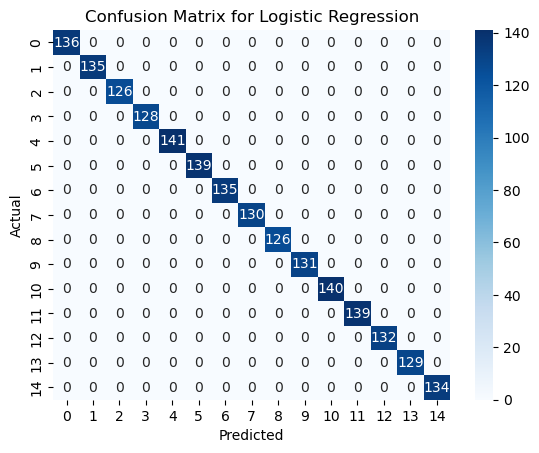


--- K-Nearest Neighbors ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       141
           5       1.00      1.00      1.00       139
           6       1.00      1.00      1.00       135
           7       1.00      1.00      1.00       130
          11       1.00      1.00      1.00       126
          12       1.00      1.00      1.00       131
          13       1.00      1.00      1.00       140
          14       1.00      1.00      1.00       139
          15       1.00      1.00      1.00       132
          16       1.00      1.00      1.00       129
          18       1.00      1.00      1.00       134

    accuracy             

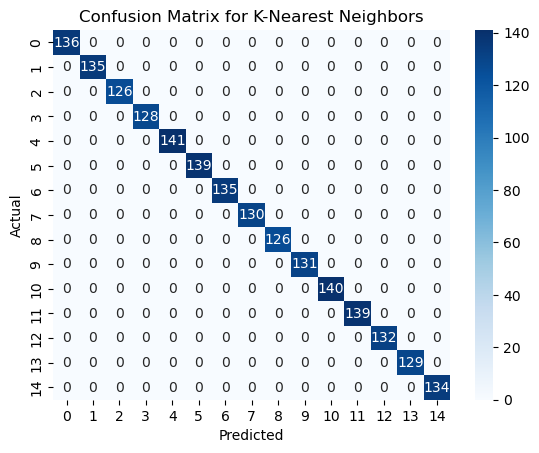


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       141
           5       1.00      1.00      1.00       139
           6       1.00      1.00      1.00       135
           7       1.00      1.00      1.00       130
          11       1.00      1.00      1.00       126
          12       1.00      1.00      1.00       131
          13       1.00      1.00      1.00       140
          14       1.00      1.00      1.00       139
          15       1.00      1.00      1.00       132
          16       1.00      1.00      1.00       129
          18       1.00      1.00      1.00       134

    accuracy          

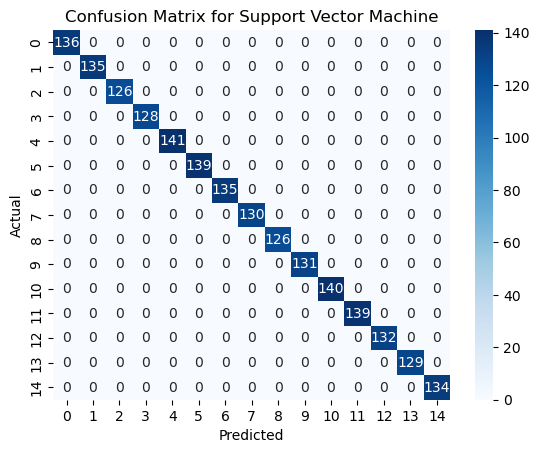


--- Naive Bayes ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       141
           5       1.00      1.00      1.00       139
           6       1.00      1.00      1.00       135
           7       1.00      1.00      1.00       130
          11       1.00      1.00      1.00       126
          12       1.00      1.00      1.00       131
          13       1.00      1.00      1.00       140
          14       1.00      1.00      1.00       139
          15       1.00      1.00      1.00       132
          16       1.00      1.00      1.00       129
          18       1.00      1.00      1.00       134

    accuracy                     

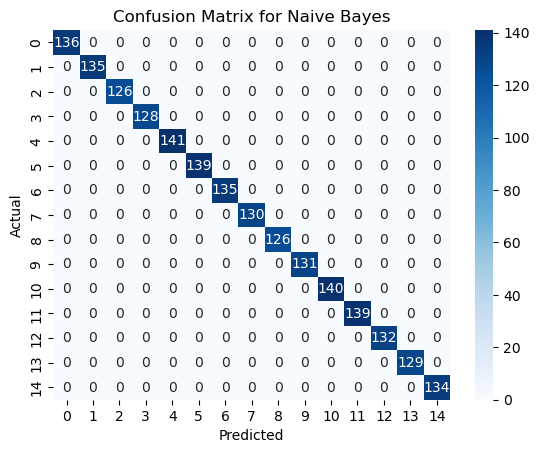


--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       141
           5       1.00      1.00      1.00       139
           6       1.00      1.00      1.00       135
           7       1.00      1.00      1.00       130
          11       1.00      1.00      1.00       126
          12       1.00      1.00      1.00       131
          13       1.00      1.00      1.00       140
          14       1.00      1.00      1.00       139
          15       1.00      1.00      1.00       132
          16       1.00      1.00      1.00       129
          18       1.00      1.00      1.00       134

    accuracy                   

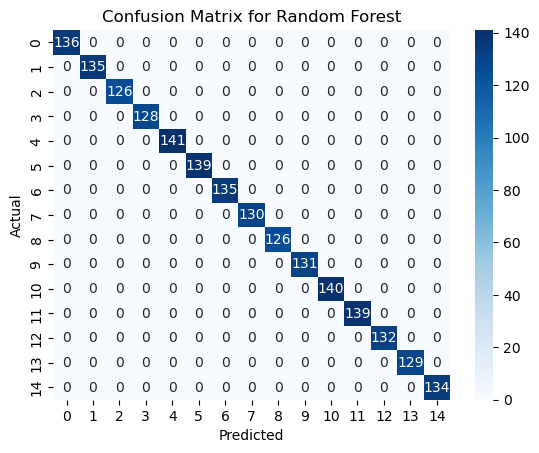

In [20]:
# Train and evaluate all models
for name, model in models.items():
    train_evaluate_model(model, name)

**Saving the Best Model**

In [21]:
# def save_best_model(model, model_name, file_name="Y"):
#     """
#     Save the best performing model using joblib.
    
#     Parameters:
#     - model: The trained ML model to save
#     - model_name: A string name for the model (for logging purposes)
#     - file_name: File path to save the model (default is 'best_chatbot_model.joblib')
    # """
joblib.dump(model, "best_chatbot_model.joblib")


['best_chatbot_model.joblib']

In [24]:
print(data.columns.tolist())

['Question', 'Answer', 'Encoded_Intent']
